# DBSCAN

This Code template is for the Cluster analysis using a simple DBSCAN (Density-Based Spatial Clustering of Applications with Noise) Clustering algorithm and includes 2D and 3D cluster visualization of the Clusters.

### Required Packages

In [4]:
import operator
import warnings
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
warnings.filterwarnings("ignore")

### Initialization

Filepath of CSV file

In [5]:
file_path = "C:/Users/aish2/Documents/BlobCity/Datasets/Clustering/heart_failure_clinical_records_dataset.csv"

List of features which are required for model training

In [6]:
features=['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']

### Data Fetching

Pandas is an open-source, BSD-licensed library providing high-performance, easy-to-use data manipulation and data analysis tools.

We will use panda's library to read the CSV file using its storage path.And we use the head function to display the initial row or entry.

In [7]:
df=pd.read_csv(file_path)
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### Feature Selections

It is the process of reducing the number of input variables when developing a predictive model. Used to reduce the number of input variables to both reduce the computational cost of modelling and, in some cases, to improve the performance of the model.

We will assign all the required input features to X.

In [8]:
X = df[features]

### Data Preprocessing

Since the majority of the machine learning models in the Sklearn library doesn't handle string category data and Null value, we have to explicitly remove or replace null values. The below snippet have functions, which removes the null value if any exists. And convert the string classes data in the datasets by encoding them to integer classes.


In [9]:
def NullClearner(df):
    if(isinstance(df, pd.Series) and (df.dtype in ["float64","int64"])):
        df.fillna(df.mean(),inplace=True)
        return df
    elif(isinstance(df, pd.Series)):
        df.fillna(df.mode()[0],inplace=True)
        return df
    else:return df
def EncodeX(df):
    return pd.get_dummies(df)

Calling preprocessing functions on the feature and target set.

In [10]:
x=X.columns.to_list()
for i in x:
    X[i]=NullClearner(X[i])
X=EncodeX(X)
X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


### Model

The DBSCAN algorithm views clusters as areas of high density separated by areas of low density. Due to this rather generic view, clusters found by DBSCAN can be any shape, as opposed to k-means which assumes that clusters are convex shaped. The central component to the DBSCAN is the concept of core samples, which are samples that are in areas of high density. 
A cluster is therefore a set of core samples, each close to each other and a set of non-core samples that are close to a core sample.

#### Tuning Parameters

> **eps**:The maximum distance between two samples for one to be considered as in the neighborhood of the other. 

> **min_samples**:The number of samples (or total weight) in a neighborhood for a point to be considered as a core point.

> **metric**:The metric to use when calculating distance between instances in a feature array.

> **algorithm**:The algorithm to be used by the NearestNeighbors module to compute pointwise distances and find nearest neighbors.

> **leaf_size**:Leaf size passed to BallTree or cKDTree. 

> **p**: The power of the Minkowski metric to be used to calculate distance between points.

[For more detail on API](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)

In [11]:
y_pred = DBSCAN(eps=10,min_samples=5,n_jobs=-1).fit_predict(X)

### Cluster Analysis

First, we add the cluster labels from the trained model into the copy of the data frame for cluster analysis/visualization.

In [12]:
ClusterDF = X.copy()
ClusterDF['ClusterID'] = y_pred
ClusterDF.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,ClusterID
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,-1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,-1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,-1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,-1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,-1


#### Cluster Records
The below bar graphs show the number of data points in each available cluster.

<AxesSubplot:>

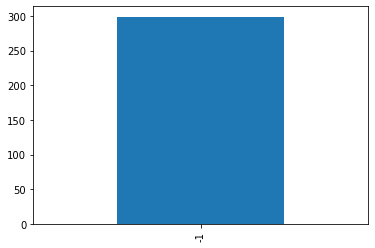

In [13]:
ClusterDF['ClusterID'].value_counts().plot(kind='bar')

#### Cluster Plots
Below written functions get utilized to plot 2-Dimensional and 3-Dimensional cluster plots on the available set of features in the dataset. Plots include different available clusters along with cluster centroid.

In [137]:
def Plot2DCluster(X_Cols,df):
    for i in list(itertools.combinations(X_Cols, 2)):
        plt.rcParams["figure.figsize"] = (8,6)
        xi,yi=df.columns.get_loc(i[0]),df.columns.get_loc(i[1])
        for j in df['ClusterID'].unique():
            DFC=df[df.ClusterID==j]
            plt.scatter(DFC[i[0]],DFC[i[1]],cmap=plt.cm.Accent,label=j)
        plt.xlabel(i[0])
        plt.ylabel(i[1])
        plt.legend()
        plt.show()

def Plot3DCluster(X_Cols,df):
    for i in list(itertools.combinations(X_Cols, 3)):
        xi,yi,zi=df.columns.get_loc(i[0]),df.columns.get_loc(i[1]),df.columns.get_loc(i[2])
        fig,ax = plt.figure(figsize = (16, 10)),plt.axes(projection ="3d")
        ax.grid(b = True, color ='grey',linestyle ='-.',linewidth = 0.3,alpha = 0.2)
        for j in df['ClusterID'].unique():
            DFC=df[df.ClusterID==j]
            ax.scatter3D(DFC[i[0]],DFC[i[1]],DFC[i[2]],alpha = 0.8,cmap=plt.cm.Accent,label=j)
        ax.set_xlabel(i[0])
        ax.set_ylabel(i[1])
        ax.set_zlabel(i[2])
        plt.legend()
        plt.show()
    
def Plotly3D(X_Cols,df):
    for i in list(itertools.combinations(X_Cols,3)):
        xi,yi,zi=df.columns.get_loc(i[0]),df.columns.get_loc(i[1]),df.columns.get_loc(i[2])
        fig2=px.scatter_3d(df, x=i[0], y=i[1],z=i[2],color=df['ClusterID'])
        fig2.show()

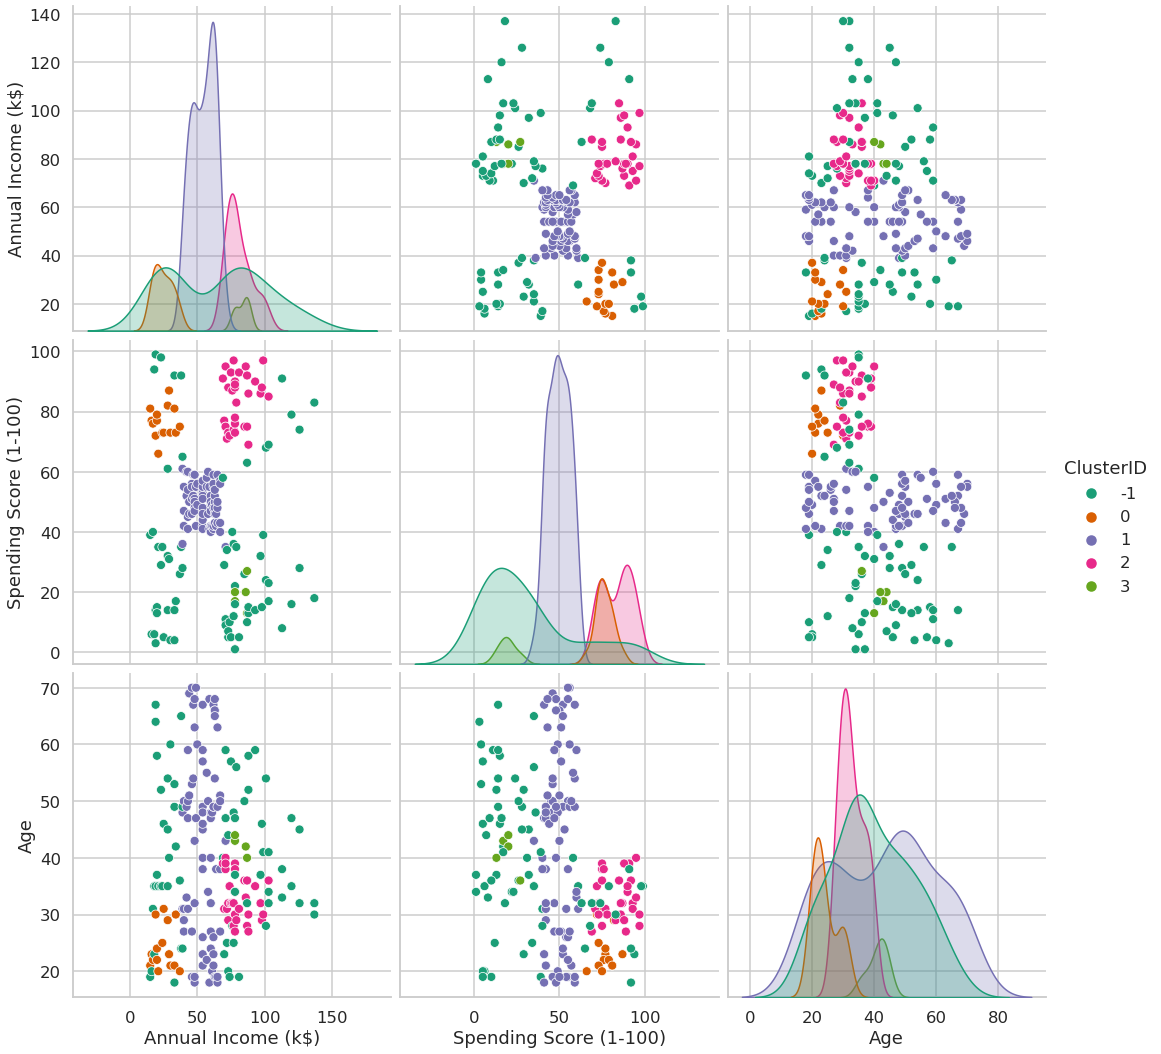

In [138]:
sns.set_style("whitegrid")
sns.set_context("talk")
plt.rcParams["lines.markeredgewidth"] = 1
sns.pairplot(data=ClusterDF, hue='ClusterID', palette='Dark2', height=5)

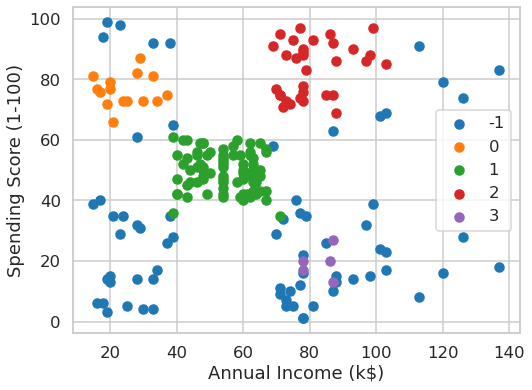

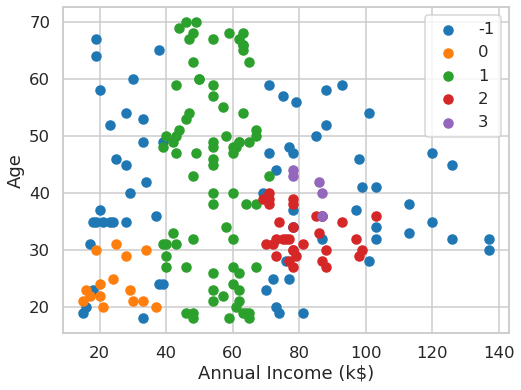

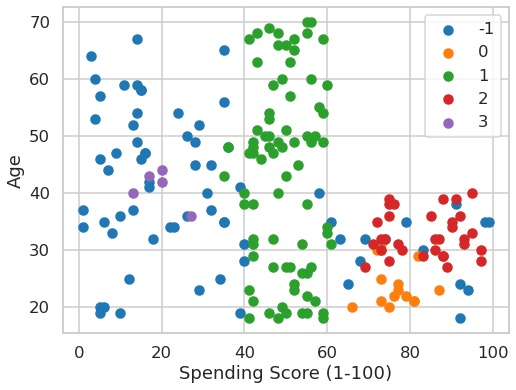

In [139]:
Plot2DCluster(X.columns,ClusterDF)

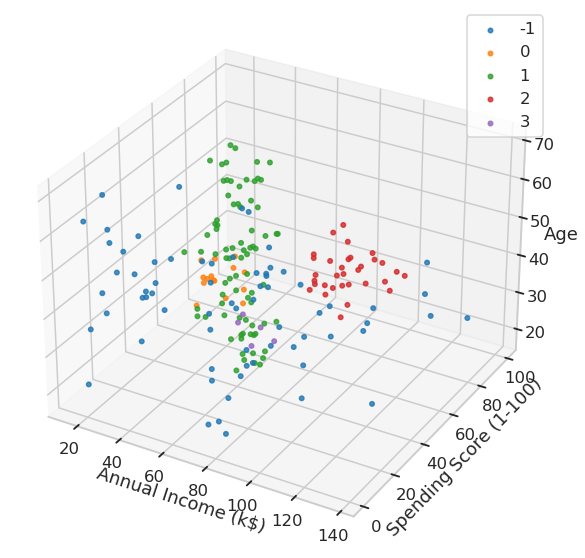

In [140]:
Plot3DCluster(X.columns,ClusterDF)

In [141]:
Plotly3D(X.columns,ClusterDF)

####  [Created by Thilakraj Devadiga](https://github.com/Thilakraj1998)